# Accent Recognition

In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import os
import IPython.display as ipd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'librosa'

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [ ]:
# recordings path
rec_path = "Project/recordings/"

In [ ]:
os.listdir(rec_path)

['afrikaans1.mp3',
 'afrikaans2.mp3',
 'afrikaans3.mp3',
 'afrikaans4.mp3',
 'afrikaans5.mp3',
 'agni1.mp3',
 'akan1.mp3',
 'albanian1.mp3',
 'albanian2.mp3',
 'albanian3.mp3',
 'albanian4.mp3',
 'albanian5.mp3',
 'albanian6.mp3',
 'albanian7.mp3',
 'albanian8.mp3',
 'albanian9.mp3',
 'amazigh1.mp3',
 'amazigh2.mp3',
 'amharic1.mp3',
 'amharic10.mp3',
 'amharic11.mp3',
 'amharic12.mp3',
 'amharic13.mp3',
 'amharic14.mp3',
 'amharic15.mp3',
 'amharic16.mp3',
 'amharic17.mp3',
 'amharic18.mp3',
 'amharic19.mp3',
 'amharic2.mp3',
 'amharic20.mp3',
 'amharic3.mp3',
 'amharic4.mp3',
 'amharic5.mp3',
 'amharic6.mp3',
 'amharic7.mp3',
 'amharic8.mp3',
 'amharic9.mp3',
 'arabic1.mp3',
 'arabic10.mp3',
 'arabic100.mp3',
 'arabic101.mp3',
 'arabic102.mp3',
 'arabic11.mp3',
 'arabic12.mp3',
 'arabic13.mp3',
 'arabic14.mp3',
 'arabic15.mp3',
 'arabic16.mp3',
 'arabic17.mp3',
 'arabic18.mp3',
 'arabic19.mp3',
 'arabic2.mp3',
 'arabic20.mp3',
 'arabic21.mp3',
 'arabic22.mp3',
 'arabic23.mp3',
 'arab

In [ ]:
# checking sample audios
audio_path = rec_path+"afrikaans1.mp3"

In [ ]:
aud, sample_rate = librosa.load(audio_path)

In [ ]:
print(sample_rate)

22050


In [ ]:
len(aud)

458029

librosa noramalises the audio files between -1 and 1 and also converts the sampling rate to 22050 of all the audio files, which is quite useful for us.

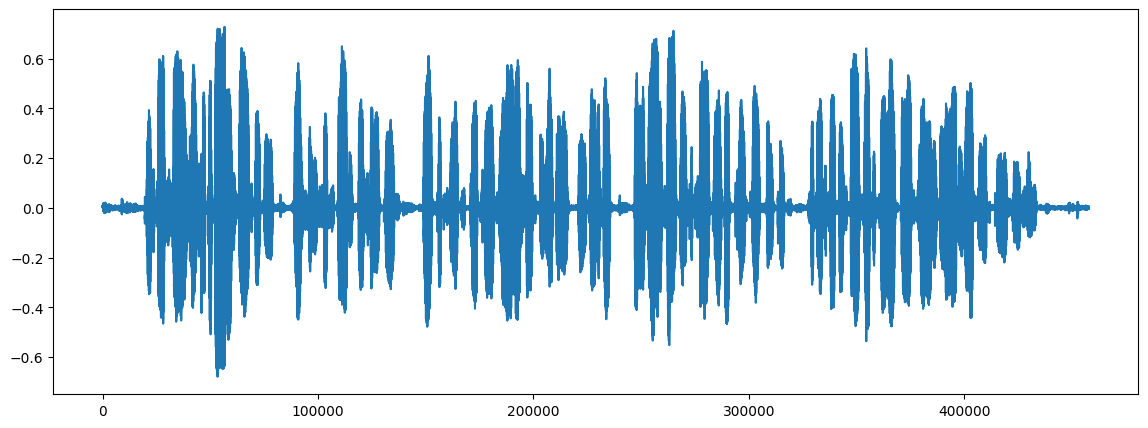

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [ ]:
# waveplot of the audio file
plt.figure(figsize=(14,5))
plt.plot(aud)

### CSV data file

In [ ]:
# reading the csv file

metadata = pd.read_csv("./Project/speakers_all.csv")

In [ ]:
metadata.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


## Feature Extraction ##
Here we will be using Mel-Frequency Cepsstral Coefficients (MFCC) from the audio files as our feature set to train our model. The mfccs summarises the frequency distribution across the windows size, so it becomes possible to analyse both the frequency and the time characteristics of the sound. This will allow us to identify features for classification

In [ ]:
mfcc = librosa.feature.mfcc(y = aud, sr = sample_rate, n_mfcc=20)
print(mfcc.shape)

(20, 895)


In [ ]:
mfcc

array([[-407.85757  , -387.25946  , -377.90118  , ..., -441.32175  ,
        -444.9362   , -448.96732  ],
       [  80.291916 ,   94.30681  ,   96.39616  , ...,   59.661114 ,
          55.342346 ,   50.05033  ],
       [  33.0334   ,   32.916153 ,   31.798866 , ...,   50.11741  ,
          47.708984 ,   43.5809   ],
       ...,
       [   5.157247 ,    6.7922764,    2.9218805, ...,   -6.220009 ,
          -5.8999786,   -3.3235703],
       [   8.374868 ,   10.623951 ,    8.351871 , ...,   -6.296741 ,
          -6.197798 ,   -3.330977 ],
       [   9.693933 ,    5.9644656,    1.5193553, ...,   -5.871545 ,
          -5.287879 ,   -2.399074 ]], dtype=float32)

In [ ]:
# extracting mfcc's for evvery audio file
rec_path = "./Project/recordings/"
metadata = pd.read_csv("./Project/speakers_all.csv")
metadata.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


In [ ]:
# we will only pick files of those speakers who have atleast 20 recordings
langCount = {}
for i in range(len(metadata)):
    if metadata['native_language'][i] in langCount:
        langCount[metadata['native_language'][i]] += 1
    else:
        langCount[metadata['native_language'][i]] = 1
print(langCount)

{'balanta': 1, 'cameroon': 1, 'fulfulde': 1, 'haitian': 6, "hawai'i": 2, 'jamaican': 3, 'liberian': 2, 'nicaragua': 4, 'northern': 1, 'poonchi': 1, 'sinhalese': 5, 'swiss': 5, 'tetun-dili': 1, 'tok': 1, 'afrikaans': 5, 'agni': 1, 'akan': 1, 'albanian': 9, 'amazigh': 2, 'amharic': 20, 'arabic': 102, 'armenian': 8, 'ashanti': 1, 'azerbaijani': 3, 'bafang': 2, 'baga': 1, 'bai': 1, 'bambara': 5, 'bamun': 1, 'bari': 2, 'basque': 2, 'bavarian': 2, 'belarusan': 3, 'bengali': 17, 'bosnian': 9, 'bulgarian': 18, 'burmese': 2, 'cantonese': 23, 'carolinian': 1, 'catalan': 4, 'cebuano': 1, 'chaldean': 2, 'chamorro': 1, 'chichewa': 1, 'chittagonian': 1, 'croatian': 8, 'czech': 9, 'danish': 8, 'dari': 5, 'dinka': 1, 'dutch': 47, 'ebira': 1, 'edo': 1, 'english': 579, 'estonian': 4, 'ewe': 2, 'fang': 1, 'fanti': 3, 'faroese': 1, 'farsi': 23, 'fataluku': 1, 'fijian': 3, 'filipino': 2, 'finnish': 8, 'french': 63, 'frisian': 1, 'ga': 6, 'gan': 1, 'ganda': 2, 'garifuna': 2, 'gedeo': 1, 'georgian': 5, 'germ

In [ ]:
# feature extraction

def feature_extractor(fileName):
    audioFile, sampleRate = librosa.load(fileName)
    mfccFeatures = librosa.feature.mfcc(y = audioFile, sr = sampleRate, n_mfcc=20)
    mfccScaledFeatures = np.mean(mfccFeatures.T, axis=0)
    spectral_centroid = librosa.feature.spectral_centroid(y=audioFile, sr=sampleRate)
    spectralCentroidFeature = np.mean(spectral_centroid.T, axis=0)

    mfccScaledFeatures = np.append(mfccScaledFeatures, spectralCentroidFeature)

    return mfccScaledFeatures

In [ ]:
# # extracting features from every file # #

# now we will iterate through every file and extract the features using Mel-Frequency Cepstal Coefficients
extractedFeatures = []

for index, row in metadata.iterrows():
    # we will only use those files which have atleast 105 recordings
    if langCount[row['native_language']] < 105:
        continue
    # if file is not present skip it
    if row['file_missing?']==True:
        continue
    # if file not in directory
    if not os.path.isfile(os.path.join(os.path.abspath(rec_path),str(row['filename'])+".mp3")):
        continue
    file_name = os.path.join(os.path.abspath(rec_path),str(row['filename'])+".mp3")
    file_labels = row['native_language']
    features = feature_extractor(file_name)
    extractedFeatures.append([features,  file_labels])
    print(index)

363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612


In [ ]:
extractedFeaturesDf = pd.DataFrame(extractedFeatures, columns=['feature','native_language'])
(extractedFeaturesDf.head())

,feature,native_language
0,"[-206.0167236328125, 82.183349609375, -6.15585...",english
1,"[-276.0698547363281, 116.41864776611328, 0.573...",english
2,"[-417.1602478027344, 43.79338073730469, 42.908...",english
3,"[-348.215087890625, 83.13541412353516, 37.3810...",english
4,"[-358.15167236328125, 69.25943756103516, 3.659...",english


In [ ]:
# splitting the data into independent and dependent datasets
X = np.array(extractedFeaturesDf['feature'].tolist())
y = np.array(extractedFeaturesDf['native_language'].tolist())

In [ ]:
X.shape

(741, 21)

In [ ]:
# label encoding
y = np.array(pd.get_dummies(y))

In [ ]:
y.shape

(741, 2)

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [ ]:
X_train.shape

(592, 21)

In [ ]:
X_test.shape

(149, 21)

In [ ]:
y_train.shape

(592, 2)

In [ ]:
y_test.shape

(149, 2)

Model creation

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
# number of classes(accents)
num_labels = y.shape[1]

In [ ]:
model = Sequential()

In [ ]:
# first layer
model.add(Dense(100, input_shape=(21,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

In [ ]:
# second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

In [ ]:
# second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

In [ ]:
# third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

In [ ]:
# final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 100)               2200      
                                                                 
 activation_52 (Activation)  (None, 100)               0         
                                                                 
 dropout_39 (Dropout)        (None, 100)               0         
                                                                 
 dense_53 (Dense)            (None, 200)               20200     
                                                                 
 activation_53 (Activation)  (None, 200)               0         
                                                                 
 dropout_40 (Dropout)        (None, 200)               0         
                                                                 
 dense_54 (Dense)            (None, 100)             

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# training the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

numEpochs = 500
numBatchSize = 64

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', verbose=1, save_best_only=True)

start = datetime.now()

model.fit(X_train, y_train, batch_size=numBatchSize, epochs=numEpochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start

print("Training completed in time: ", duration)

Epoch 1/500
 1/10 [==>...........................] - ETA: 10s - loss: 264.2422 - accuracy: 0.4062
Epoch 1: val_loss improved from inf to 82.06731, saving model to saved_models\weights.best.basic_mlp.hdf5
10/10 [==============================] - 1s 36ms/step - loss: 140.5778 - accuracy: 0.6233 - val_loss: 82.0673 - val_accuracy: 0.7919
Epoch 2/500
 1/10 [==>...........................] - ETA: 0s - loss: 121.7310 - accuracy: 0.7031
Epoch 2: val_loss improved from 82.06731 to 19.25765, saving model to saved_models\weights.best.basic_mlp.hdf5
10/10 [==============================] - 0s 12ms/step - loss: 92.6505 - accuracy: 0.6909 - val_loss: 19.2577 - val_accuracy: 0.7919
Epoch 3/500
 1/10 [==>...........................] - ETA: 0s - loss: 55.2442 - accuracy: 0.6094
Epoch 3: val_loss improved from 19.25765 to 7.08424, saving model to saved_models\weights.best.basic_mlp.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 67.2420 - accuracy: 0.5811 - val_loss: 7.0842 - val_acc

In [ ]:
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1]*100, end="%")

79.1946291923523%

In [ ]:
for i in range(len(langCount)):
    if(langCount[list(langCount.keys())[i]] < 103):
        continue
    print(i, end=" ")
    print(list(langCount.keys())[i])

53 english
176 spanish
